# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

In [2]:
financial = pd.read_csv("data_raw/financial.csv")


<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset



In [19]:
financial["date"] = pd.to_datetime(financial["date_str"])
financial         = financial.sort_values("date",ascending = True)

date1 = pd.to_datetime(financial["date_ex1"], format = "%B %d %Y")
date2 = pd.to_datetime(financial["date_ex2"], format = "%A, %Y-%m-%d")
date3 = pd.to_datetime(financial["date_ex3"], format = "%b-%d, %y")

<font size = "5">
(b) Line plots from multiple columns with a legend




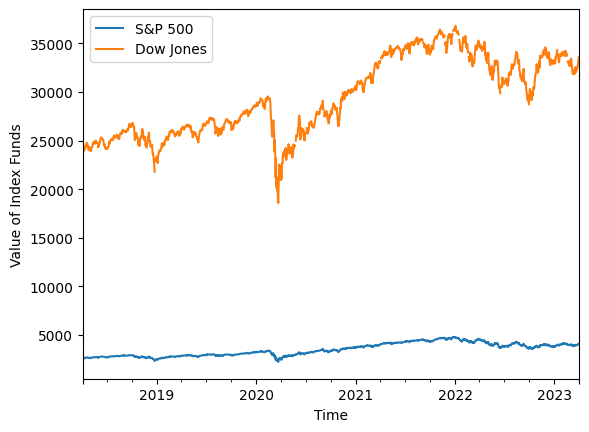

In [4]:
financial[["date","sp500","djia"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Value of Index Funds")
plt.legend(["S&P 500","Dow Jones"])

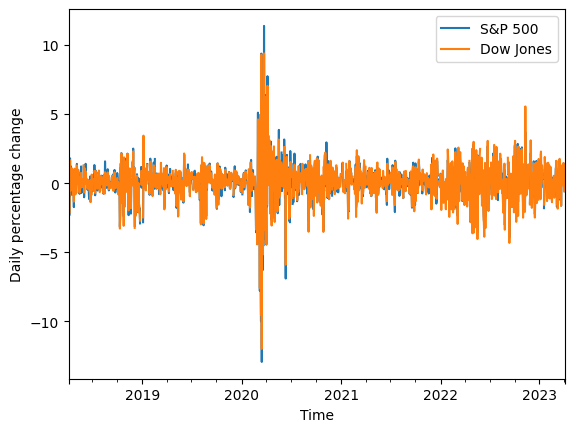

In [6]:
financial["lag_sp500"]    = financial["sp500"].shift(1)
financial["diff_sp500"] = financial["sp500"].diff()
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]

financial["lag_dowjones"]    = financial["djia"].shift(1)
financial["diff_dowjones"] = financial["djia"].diff()
financial["growth_dowjones"] = financial["diff_dowjones"]* 100/financial["lag_dowjones"]


financial[["date","growth_dowjones", "growth_sp500"]].set_index("date").plot()
plt.xlabel("Time")
plt.ylabel("Daily percentage change")
plt.legend(["S&P 500","Dow Jones"])

<font size = "5">
(c) Compute growth rates for a time series



In [7]:
financial["growth_sp500"] = financial["diff_sp500"]* 100/financial["lag_sp500"]
financial["growth_dowjones"] = financial["diff_dowjones"]* 100/financial["lag_dowjones"]

<font size = "5">
(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22



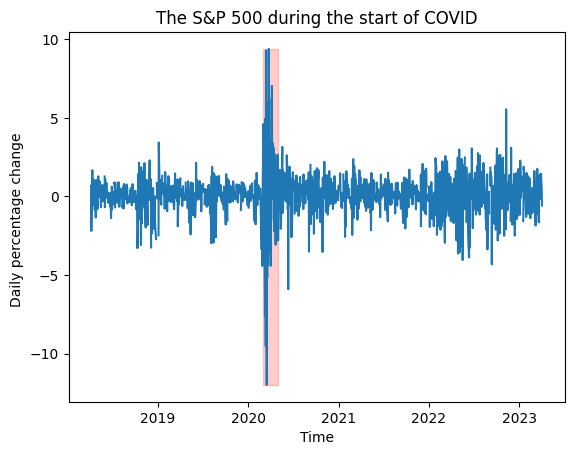

In [9]:
financial["bool_period"]  = financial["date"].between("2020-03-01","2020-05-01")

plt.plot("date", "growth_sp500", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and meximum of the outcome.
# we use "where" to test a logical condition

vec_y = financial["growth_sp500"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_period"],
                 alpha = 0.2,color = "red")

plt.show()

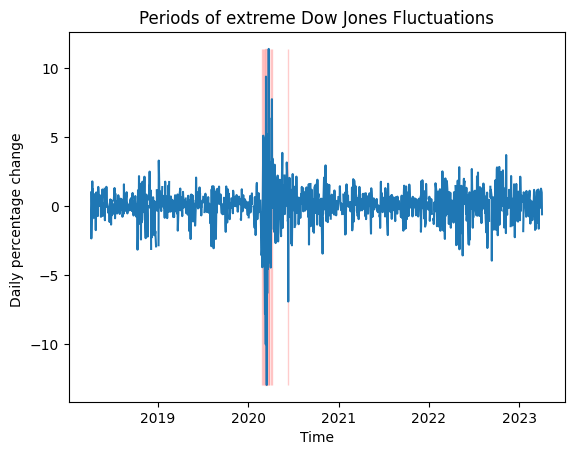

In [13]:
financial["diff_djia"]   = financial["djia"].diff()
financial["lag_djia"]    = financial["djia"].shift(1)
financial["growth_djia"] = financial["diff_djia"]* 100/financial["lag_djia"]

financial["bool_djia"] = (financial["growth_djia"] > 4) | (financial["growth_djia"] < -4)

# Create a line plot
plt.plot("date", "growth_djia", data = financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Periods of extreme Dow Jones Fluctuations")

# Add shaded region
vec_y = financial["growth_djia"]
plt.fill_between(x= financial["date"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = financial["bool_djia"],
                 alpha = 0.2,color = "red")

plt.show()


<font size = "5">
(e) Compute aggregate dataset by time period



Text(0.5, 1.0, 'Weekly average stock market performance')

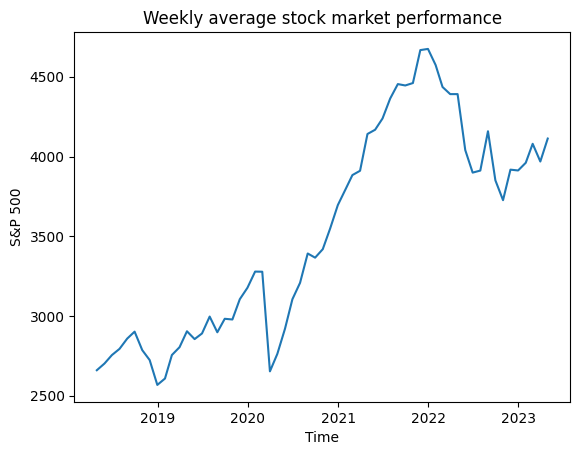

In [17]:
month_config = pd.Grouper(key='date', freq='m')

monthlydata = (financial
               .groupby(month_config) 
               .agg(sp500_mean = ("sp500","mean"))
               .reset_index())

plt.plot("date","sp500_mean",
          data = monthlydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly average stock market performance")

Text(0.5, 1.0, 'Weekly average stock market performance')

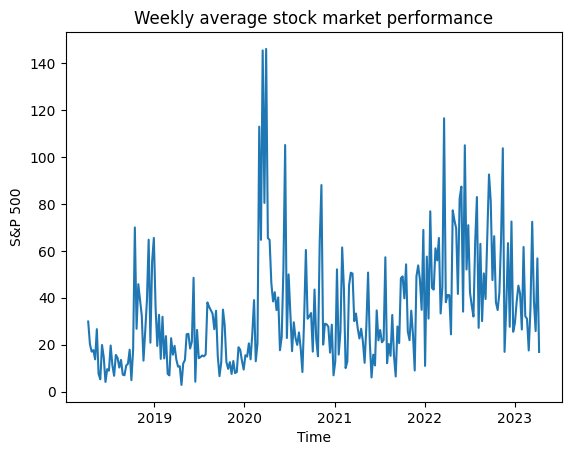

In [18]:
week_config = pd.Grouper(key='date', freq='w')

weeklylydata = (financial
               .groupby(week_config) 
               .agg(sp500_std = ("sp500","std"))
               .reset_index())


plt.plot("date","sp500_std",
          data = weeklylydata.sort_values("date",ascending = True))
plt.xlabel("Time")
plt.ylabel("S&P 500")
plt.title("Weekly average stock market performance")

<font size = "5">
(f) Convert a dataset to long format

In [15]:
financial_long = pd.melt(financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars='date',
                         value_vars=['sp500','djia'])

display(financial_long)

,date,portfolio_type,portfolio_value
0,2018-04-04,sp500,2644.69
1,2018-04-05,sp500,2662.84
2,2018-04-06,sp500,2604.47
3,2018-04-09,sp500,2613.16
4,2018-04-10,sp500,2656.87
...,...,...,...
2605,2023-03-29,djia,32717.60
2606,2023-03-30,djia,32859.03
2607,2023-03-31,djia,33274.15
2608,2023-04-03,djia,33601.15


In [16]:
financial_long2 = pd.melt(financial,
                         var_name   = "var_name",
                         value_name = "value_name",
                         id_vars='date',
                         value_vars=['growth_sp500','growth_dowjones'])



financial_long2

,date,var_name,value_name
0,2018-04-04,growth_sp500,NaN
1,2018-04-05,growth_sp500,0.686281
2,2018-04-06,growth_sp500,-2.192021
3,2018-04-09,growth_sp500,0.333657
4,2018-04-10,growth_sp500,1.672687
...,...,...,...
2605,2023-03-29,growth_dowjones,0.998171
2606,2023-03-30,growth_dowjones,0.432275
2607,2023-03-31,growth_dowjones,1.263336
2608,2023-04-03,growth_dowjones,0.982745
